 <img src="data/opi.jpg">

# OPI  A

## A.1 BEBES

Para cada AGEB del Municipio de Toluca, estima cuántos bebés de 0 a 6 meses de edad
habitan ahí el día de hoy. Explica tu razonamiento en menos de 300 palabras.

## Explicación

Para poder estimar la cantidad de niños de 0-6 meses de edad por cada AGEB primero busque un estimador de cuantos niños nacen al año. Utilice el histórico de nacimientos en todo el país y filtre para Toluca, extraje el numero de nacimientos anuales desde 1985 hasta el 2018, para poder estimar de alguna forma cuantos niños nacerán en Toluca.
Por otro lado, busque la cantidad de niños de entre 0-2 años en todo Toluca y en cada AGEB. Esto con la intención de poder saber la razón que aporta cada AGEB a la población final de Toluca.  Con esta información pude encontrar un parámetro que infiera cuantos niños habrán de entre 0-2 años.  
Al multiplicar estos dos parámetros (el numero estimado de nacimientos en Toluca y el porcentaje que aporta cada AGEB a la poblacion final de niños de entre 0-2 años) pude estimar del total de nacimientos, que porcentaje aportaría cada municipio, y así poder construir un estimador de cuantos niños de entre 0-6 meses de edad hay por AGEB.


Ligas utilizadas: 


(1) https://www.inegi.org.mx/sistemas/olap/Proyectos/bd/continuas/natalidad/nacimientos.asp#

(2) https://www.inegi.org.mx/programas/ccpv/2010/default.html#Datos_abiertos

### Dependencias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

colors = ["#242c54", "#eb3844", "#645674", "#0c0c3c", "#cdcdd7","#d13244"]
customPalette = sns.set_palette(sns.color_palette(colors))



### Datos

In [2]:
data=pd.read_csv('data/resultados_2010.csv',encoding='utf-8')
natalidad=pd.read_csv('data/Natalidad_INEGI.csv',encoding='latin1')

### Análisis

Usando la liga (1) podemos obtener el número de Nacimientos por cada entidad, y así observar cual es la tendencia anual de nacimientos, en el caso de toluca es la siguiente:

In [3]:
natalidad_toluca = natalidad.loc[natalidad.Entidad=='Toluca'].set_index('Entidad').transpose()
natalidad_df = pd.DataFrame({'Año':natalidad_toluca.index.tolist(),'Nacimientos':[x.replace(',','') for x in natalidad_toluca.Toluca.tolist()]})
natalidad_df = natalidad_df.astype({"Año": int, "Nacimientos": float})
natalidad_df

,Año,Nacimientos
0,1985,27710.0
1,1986,28038.0
2,1987,28617.0
3,1988,29656.0
4,1989,31847.0
5,1990,33103.0
6,1991,32696.0
7,1992,34828.0
8,1993,36802.0
9,1994,32950.0


Text(0.5, 1.0, 'Tendencia de Nacimientos en Toluca')

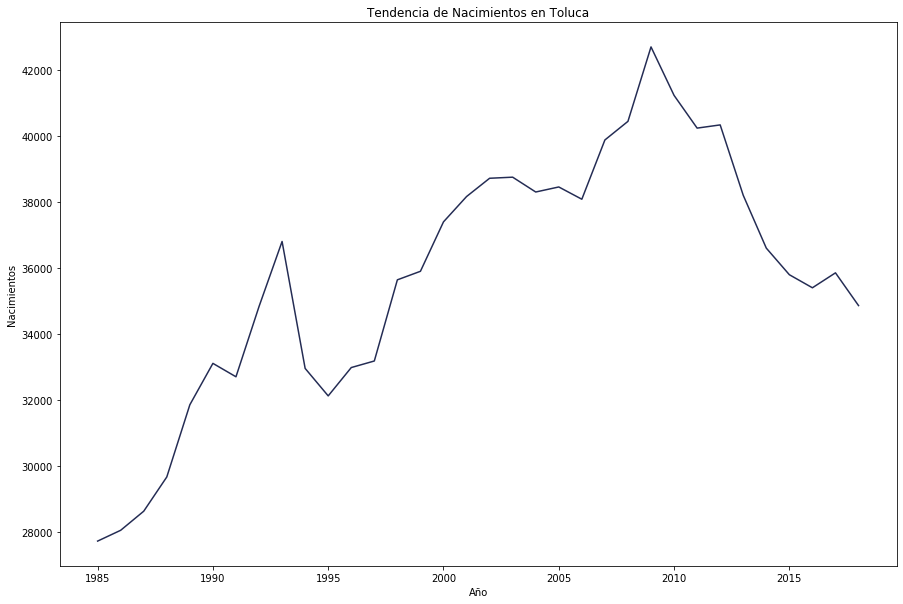

In [4]:
plt.figure(figsize=(15,10))
sns.lineplot(data=natalidad_df, x="Año", y="Nacimientos", palette=customPalette).set_title('Tendencia de Nacimientos en Toluca')

Por lo que es posible estimar que en promedio anualmente nacen 35749 niños

In [5]:
media_natalidad=np.mean(natalidad_df.Nacimientos)

Usando los datos de la liga (2), sabemos que para el año 2010 habian 44223 niños de entre 0-2 años de edad en Toluca.

In [6]:
data_toluca = data[['nom_loc','p_0a2']].loc[data.nom_mun=='Toluca']
data_toluca['p_0a2'].replace({"*": 0}, inplace=True)
data_toluca.astype({"nom_loc": str, "p_0a2": float})
data_toluca=data_toluca.astype({"nom_loc": str, "p_0a2": float})
toluca_localidades = pd.DataFrame(data_toluca.groupby(['nom_loc']).sum())
toluca_localidades


,p_0a2
nom_loc,
Barrio Santa Cruz,270.0
Cacalomacán,601.0
Calixtlahuaca,425.0
El Cerrillo Vista Hermosa,591.0
Fraccionamiento Real de San Pablo,241.0
Jicaltepec Autopan,373.0
Jicaltepec Cuexcontitlán,344.0
La Constitución Toltepec,379.0
San Andrés Cuexcontitlán,1260.0


In [7]:
total_niños_municipio_2010 = 44223

Text(0.5, 1.0, 'Cantidad de niños de entre 0-2 años por AGEB en Toluca')

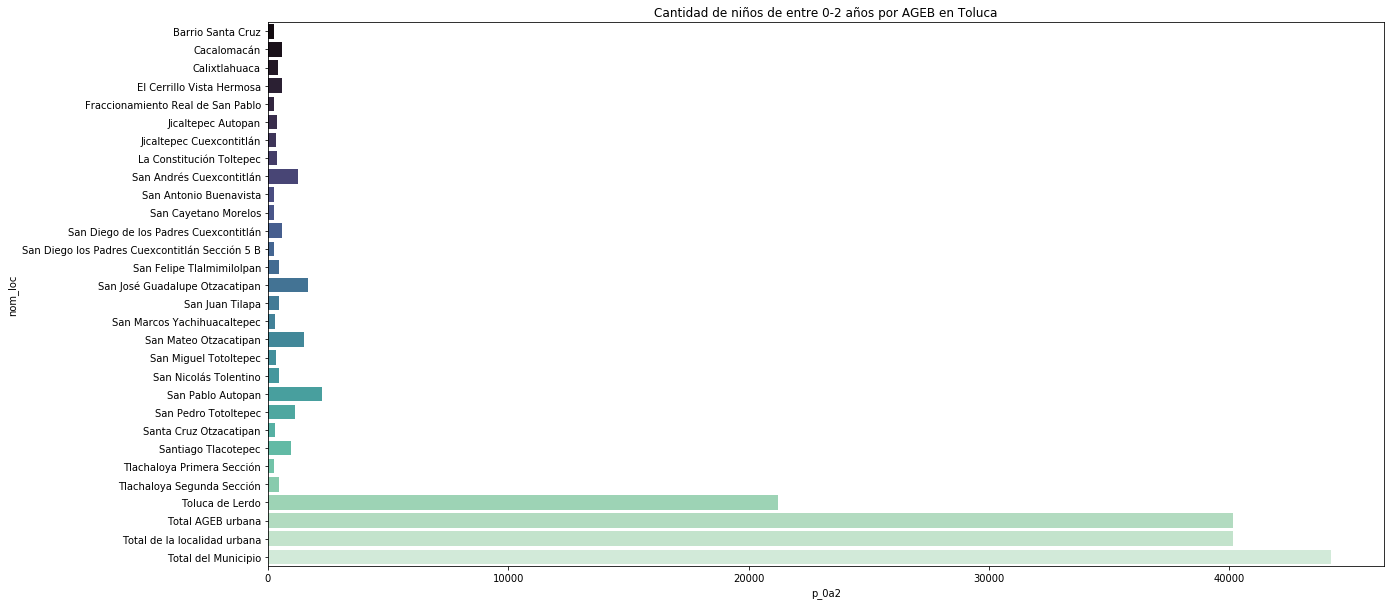

In [8]:
plt.figure(figsize=(20,10))
sns.barplot( data=toluca_localidades, 
            y=toluca_localidades.index, 
            x='p_0a2',  
            palette="mako",
            
               ).set_title('Cantidad de niños de entre 0-2 años por AGEB en Toluca')


Podemos calcular el porcentaje de poblacion de cada municipio con respecto a el total de la AGEB, para saber cuanto aporta cada AGEB a la poblacion de la entidad de la siguiente manera:

In [9]:
def f(x):
    return x/total_niños_municipio_2010
toluca_localidades['Porcentaje'] = toluca_localidades.apply(lambda x: f(x['p_0a2']),axis=1)
toluca_localidades

,p_0a2,Porcentaje
nom_loc,,
Barrio Santa Cruz,270.0,0.006105
Cacalomacán,601.0,0.013590
Calixtlahuaca,425.0,0.009610
El Cerrillo Vista Hermosa,591.0,0.013364
Fraccionamiento Real de San Pablo,241.0,0.005450
Jicaltepec Autopan,373.0,0.008435
Jicaltepec Cuexcontitlán,344.0,0.007779
La Constitución Toltepec,379.0,0.008570
San Andrés Cuexcontitlán,1260.0,0.028492


Si combinamos el porcentaje aportado por el estimado de nacimientos anuales podremos dar un parametro que describa cuantos nacimientos anuales se darán en el 2020, por lo que podriamos dar una estimacion de cuantos niños nacieron en cada  AGEB, es decir cuantos niños de entre 0-6 meses hay en cada  AGEB.

In [10]:
def g(x):
    return x*media_natalidad
toluca_localidades['Niños_0-6Meses'] = toluca_localidades.apply(lambda x: g(x['Porcentaje']),axis=1)
toluca_localidades

,p_0a2,Porcentaje,Niños_0-6Meses
nom_loc,,,
Barrio Santa Cruz,270.0,0.006105,218.264824
Cacalomacán,601.0,0.013590,485.841330
Calixtlahuaca,425.0,0.009610,343.565000
El Cerrillo Vista Hermosa,591.0,0.013364,477.757447
Fraccionamiento Real de San Pablo,241.0,0.005450,194.821565
Jicaltepec Autopan,373.0,0.008435,301.528812
Jicaltepec Cuexcontitlán,344.0,0.007779,278.085553
La Constitución Toltepec,379.0,0.008570,306.379141
San Andrés Cuexcontitlán,1260.0,0.028492,1018.569177


Text(0.5, 1.0, 'Cantindad de niños de entre 0-6 meses por AGEB en Toluca')

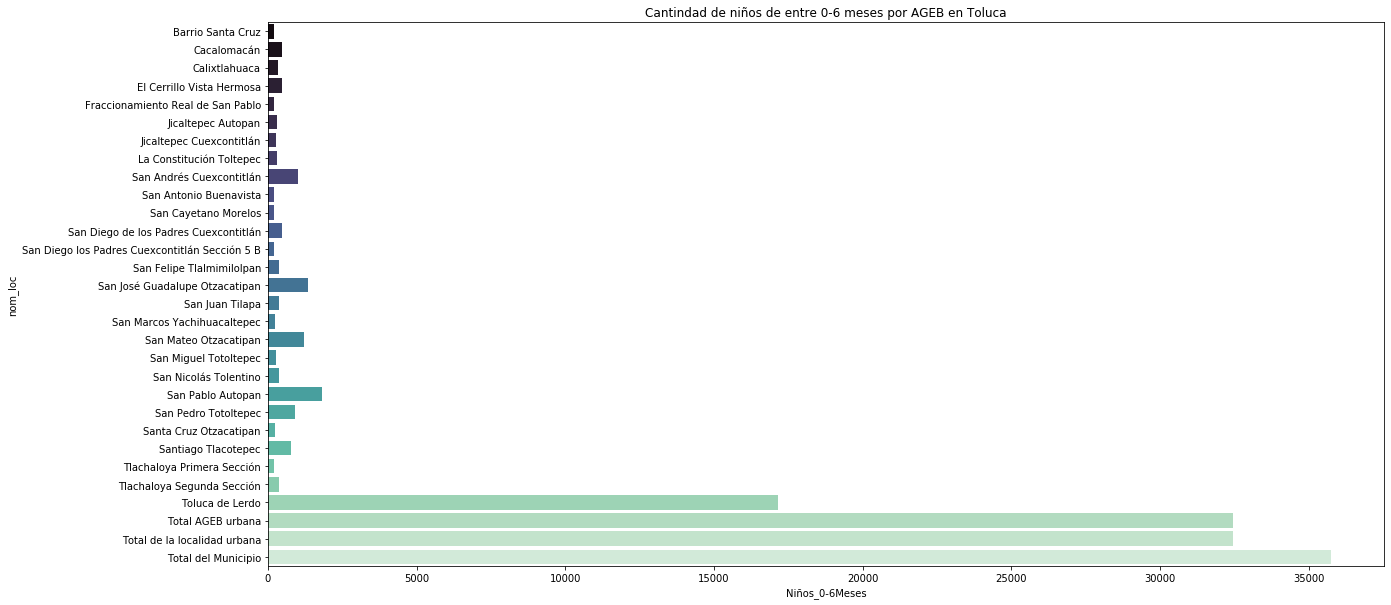

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(data=toluca_localidades,
            y=toluca_localidades.index,
            x='Niños_0-6Meses',
             palette="mako"
           ).set_title('Cantindad de niños de entre 0-6 meses por AGEB en Toluca')